In [1]:
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from scipy.signal import find_peaks

data_path = "../data"

Matplotlib is building the font cache; this may take a moment.


In [2]:
article_ids = []
with open("../data/article_ids.csv", "r") as f:
    for aid in f.readlines():
        article_ids.append(aid.rstrip())
print(article_ids)
        
article_df = pd.read_csv(f"{data_path}/all_articles.csv")
article_df['date_published']= pd.to_datetime(article_df['date_published'])
print(f"Total articles: {article_df.shape[0]}")
article_df = article_df[article_df["id"].isin(article_ids)]
article_df.to_csv(f"{data_path}/article_features.csv")
print(f"Total articles: {article_df.shape[0]}")
article_df.head()

['1060266', '1183733', '1215796', '1557808', '1588084', '1619003', '1858904', '1804595', '1650299', '1686905', '1689504', '1692772', '1694943', '1696026', '1698377', '1708211', '1733855', '1745263', '1765438', '1766714', '1790795', '1797282', '1800908', '1807030', '1822635', '1859267', '1863612', '1872577', '1875759', '1875818', '1876748', '1905027', '1915386', '1925157', '1938411', '1947574', '1959303', '1984555', '1988227', '1989692', '2014871', '2016822', '2017092', '2020148', '2028815', '2030993', '2060981', '2076569', '2074418', '2075712', '2081743', '2085903', '2091826', '2099729', '2113951', '2119374', '2168163', '2140677', '2151850', '2167121']
Total articles: 3552
Total articles: 62


,id,title,date_published,url,domain,num_tweets,score,site_type
1080,1060266,Voter Fraud: 670 Ballots Cast in Georgia Preci...,2018-08-07 20:10:15+00:00,https://www.breitbart.com/politics/2018/08/07/...,breitbart.com,4088,8.241311,claim
1081,1060266,Voter Fraud: 670 Ballots Cast in Georgia Preci...,2018-08-07 20:10:15+00:00,https://www.breitbart.com/big-government/2018/...,breitbart.com,4088,8.241311,claim
1625,1183733,GOP-Controlled Wisconsin Legislature Votes To ...,2018-12-04 19:47:21+00:00,https://politics.theonion.com/gop-controlled-w...,theonion.com,6166,7.897564,claim
1799,1215796,The NC Democrats overstated this law’s effect ...,2019-01-07 00:00:00+00:00,https://www.politifact.com/north-carolina/stat...,politifact.com,6,9.647472,fact_checking
1827,1557808,New York Democrats Move to Register Illegal Al...,2020-01-10 02:28:18+00:00,https://www.breitbart.com/politics/2020/01/09/...,breitbart.com,764,7.045094,claim


In [8]:
article_feature_df = pd.read_csv(f"{data_path}/article_features.csv").iloc[:, 1:].drop_duplicates(["id"], ignore_index=True)
print(article_feature_df.shape)
article_feature_df.sort_values("num_peaks", ascending=False).head()

(43, 12)


,id,title,date_published,url,domain,num_tweets,score,site_type,num_peaks,active_days,lifespan,active_ratio
19,1858904,Trump's Absentee vs. Mail-In Ballot Spin,2020-06-19 15:02:00+00:00,https://www.factcheck.org/2020/06/trumps-absen...,factcheck.org,2476,104.872978,fact_checking,4,100,152,0.657895
12,1766714,Database Swells to 1285 Proven Cases of Voter ...,2020-05-09 04:00:00+00:00,https://www.dailysignal.com/2020/05/09/databas...,dailysignal.com,1223,22.271851,claim,3,153,193,0.792746
0,1060266,Voter Fraud: 670 Ballots Cast in Georgia Preci...,2018-08-07 20:10:15+00:00,https://www.breitbart.com/politics/2018/08/07/...,breitbart.com,4088,8.241311,claim,3,116,824,0.140777
27,1988227,How to make sure your ballot is counted this fall,2020-08-17 04:00:00+00:00,https://www.politifact.com/article/2020/aug/17...,politifact.com,600,99.220718,fact_checking,3,20,78,0.256410
5,1619003,Voter Fraud Ring Caught Rigging Elections for ...,2020-03-13 13:04:55+00:00,https://neonnettle.com/news/5336-voter-fraud-r...,neonnettle.com,871,8.469290,claim,2,75,250,0.300000


In [31]:
peaks_df = pd.read_csv("../data/article_peaks.csv").iloc[:,1:]
peaks_df.peak_date = pd.to_datetime(peaks_df.peak_date)
peaks_df["year"] = peaks_df.peak_date.dt.year
peaks_df["month"] = peaks_df.peak_date.dt.month
peaks_df.sort_values("peak_height", ascending=False).head()

,aid,peak_date,peak_height,year,month
62,2168163,2020-11-05,80968.0,2020,11
57,2081743,2020-09-28,16739.0,2020,9
38,1875818,2020-06-27,5727.0,2020,6
55,2076569,2020-09-26,5570.0,2020,9
50,2014871,2020-08-29,4989.0,2020,8


In [40]:
peaks_df = peaks_df[peaks_df.year >= 2020]
by_month_df = peaks_df.groupby("month").agg({"aid": "count", "peak_height": "sum"})
by_month_df.sort_values("peak_height", ascending=False)

,aid,peak_height
month,,
11,3,81633.0
9,8,28543.0
8,9,14682.0
6,7,10264.0
7,7,8644.0
4,9,7068.0
5,11,4967.0
3,1,3645.0
10,3,3117.0


<AxesSubplot:xlabel='month'>

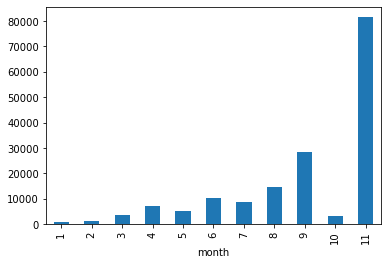

In [41]:
by_month_df["peak_height"].plot.bar()